In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
data=pd.read_csv('WorldIndex.csv')
data.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


In [3]:
data.loc[data['Continent']=='Africa', 'cla'] = "red"
data.loc[data['Continent']=='Asia', 'cla'] = "blue"
data.loc[data['Continent']=='Europe', 'cla'] = "green"
data.loc[data['Continent']=='North America', 'cla'] = "yellow"
data.loc[data['Continent']=='Oceania', 'cla'] = "black"
data.loc[data['Continent']=='South America', 'cla'] = "orange"

data

,Country,Continent,Life_expectancy,GDP_per_capita,Population,cla
0,Algeria,Africa,75.042537,4132.760292,39871528.0,red
1,Angola,Africa,52.666098,3695.793748,27859305.0,red
2,Benin,Africa,59.720707,783.947091,10575952.0,red
3,Botswana,Africa,64.487415,6532.060501,2209197.0,red
4,Burundi,Africa,57.107049,303.681022,10199270.0,red
...,...,...,...,...,...,...
172,Paraguay,South America,73.025634,4109.367724,6639119.0,orange
173,Peru,South America,74.780732,6030.343259,31376671.0,orange
174,Suriname,South America,71.294171,8818.982566,553208.0,orange
175,Uruguay,South America,77.138220,15524.842470,3431552.0,orange


In [4]:
data.dropna(how='all')

,Country,Continent,Life_expectancy,GDP_per_capita,Population,cla
0,Algeria,Africa,75.042537,4132.760292,39871528.0,red
1,Angola,Africa,52.666098,3695.793748,27859305.0,red
2,Benin,Africa,59.720707,783.947091,10575952.0,red
3,Botswana,Africa,64.487415,6532.060501,2209197.0,red
4,Burundi,Africa,57.107049,303.681022,10199270.0,red
...,...,...,...,...,...,...
172,Paraguay,South America,73.025634,4109.367724,6639119.0,orange
173,Peru,South America,74.780732,6030.343259,31376671.0,orange
174,Suriname,South America,71.294171,8818.982566,553208.0,orange
175,Uruguay,South America,77.138220,15524.842470,3431552.0,orange


#删掉含有空值的数据行

In [5]:
data1=data.dropna()
data1

,Country,Continent,Life_expectancy,GDP_per_capita,Population,cla
0,Algeria,Africa,75.042537,4132.760292,39871528.0,red
1,Angola,Africa,52.666098,3695.793748,27859305.0,red
2,Benin,Africa,59.720707,783.947091,10575952.0,red
3,Botswana,Africa,64.487415,6532.060501,2209197.0,red
4,Burundi,Africa,57.107049,303.681022,10199270.0,red
...,...,...,...,...,...,...
171,Guyana,South America,66.507512,4136.689919,768514.0,orange
172,Paraguay,South America,73.025634,4109.367724,6639119.0,orange
173,Peru,South America,74.780732,6030.343259,31376671.0,orange
174,Suriname,South America,71.294171,8818.982566,553208.0,orange


In [6]:
type(data1)

pandas.core.frame.DataFrame

# 平均寿命直方图

In [7]:
#将平均寿命单独成dataframe
data_life=data1['Life_expectancy']
data_life

0      75.042537
1      52.666098
2      59.720707
3      64.487415
4      57.107049
         ...    
171    66.507512
172    73.025634
173    74.780732
174    71.294171
175    77.138220
Name: Life_expectancy, Length: 164, dtype: float64

In [8]:
import os
from numpy import array
import numpy as np
import pylab as pl

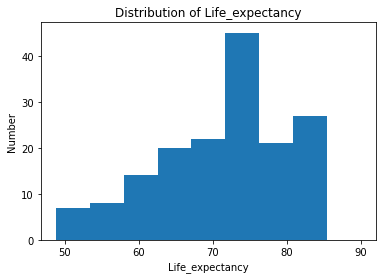

In [9]:
def draw_hist(lenths):
    data_life = lenths 
bins = np.linspace(min(data_life),90,10)
plt.hist(data_life,bins)
plt.xlabel('Life_expectancy')
plt.ylabel('Number')
plt.title('Distribution of Life_expectancy')
plt.show()

10
48.87395122
53.443512195555556
58.01307317111112
62.58263414666667
67.15219512222222
71.72175609777779
76.29131707333333
80.86087804888889
85.43043902444444
90.0


NameError: name 'bins_interval' is not defined

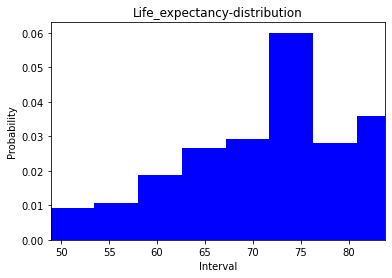

In [10]:
# 按照固定区间长度绘制频率分布直方图
# bins_interval 区间的长度
# margin        设定的左边和右边空留的大小
def probability_distribution(data_life, bins_interval=10, margin=10):
    bins = range(min(data_life), max(data_life) + bins_interval - 1, bins_interval)
print(len(bins))
for i in range(0, len(bins)):
    print(bins[i])
plt.xlim(min(data_life), max(data_life) )
plt.title("Life_expectancy-distribution")
plt.xlabel('Interval')
plt.ylabel('Probability')
# 频率分布normed=True，频次分布normed=False
prob,left,rectangle = plt.hist(x=data_life, bins=bins, density=True, histtype='bar', color=['b'])
for x, y in zip(left, prob):
       # 字体上边文字
       # 频率分布数据 normed=True
    plt.text(x + bins_interval / 2, y + 0.003, '%.2f' % y, ha='center', va='top')
        # 频次分布数据 normed=False
        # plt.text(x + bins_interval / 2, y + 0.25, '%.2f' % y, ha='center', va='top')
plt.show()

# 人均GDP直方图

In [11]:
#将人均GDP单独成dataframe
data_gdp=data1['GDP_per_capita']
data_gdp

0       4132.760292
1       3695.793748
2        783.947091
3       6532.060501
4        303.681022
           ...     
171     4136.689919
172     4109.367724
173     6030.343259
174     8818.982566
175    15524.842470
Name: GDP_per_capita, Length: 164, dtype: float64

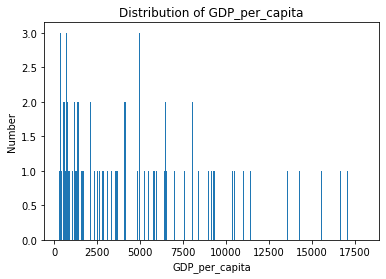

In [12]:
def draw_hist(lenths):
    data_gdp = lenths 
bins = np.linspace(min(data_gdp),18000,500)
plt.hist(data_gdp,bins)
plt.xlabel('GDP_per_capita')
plt.ylabel('Number')
plt.title('Distribution of GDP_per_capita')
plt.show()

# 人均寿命箱线图

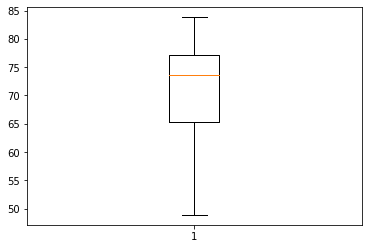

In [13]:
plt.boxplot(data_life)    #垂直显示箱线图
plt.show()

In [14]:
#箱形图描述数据
print(data_life.describe())

count    164.000000
mean      71.301273
std        8.511990
min       48.873951
25%       65.340945
50%       73.650537
75%       77.133335
max       83.843659
Name: Life_expectancy, dtype: float64


# 每个大洲的国家个数条形图

In [15]:
#按照大洲分组
grouped = data1.groupby('Continent')
grouped

In [16]:
#查看按照大洲的分组结果
grouped.groups

{'Africa': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17,
             18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
             36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 'Asia': Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
             67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
             84, 85],
            dtype='int64'),
 'Europe': Int64Index([ 86,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
             100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113,
             114, 115, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128,
             129, 130],
            dtype='int64'),
 'North America': Int64Index([131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144,
             145, 146, 147, 148, 149, 150],
            dtype='int64'),
 'Oceania': Int64Index([151, 152, 153, 155, 157

In [17]:
num=grouped.size()
num

Continent
Africa           48
Asia             36
Europe           41
North America    19
Oceania           9
South America    11
dtype: int64

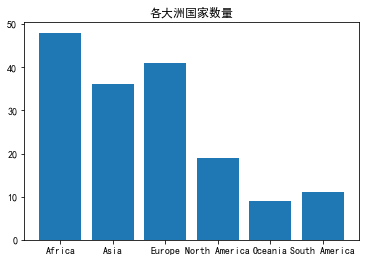

In [18]:
# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

Continent=('Africa','Asia'  , 'Europe' ,'North America', 'Oceania', 'South America') 
number=[48,36,41,19,9,11]
plt.bar(Continent, number)
plt.title('各大洲国家数量')

plt.show()

# 各大洲国家数量占比的饼图

In [19]:
data_num = pd.DataFrame({'Continent':['Africa','Asia'  , 'Europe' ,'North America', 'Oceania', 'South America'] ,
                      'number':[48,36,41,19,9,11],
                    })
data_num

,Continent,number
0,Africa,48
1,Asia,36
2,Europe,41
3,North America,19
4,Oceania,9
5,South America,11


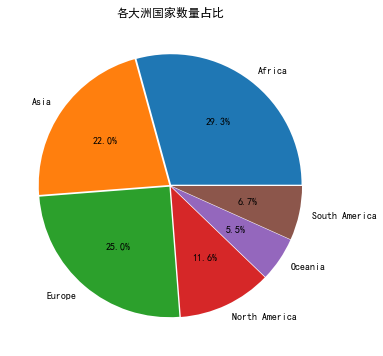

In [20]:
plt.rcParams['font.sans-serif']='SimHei'#设置中文显示
plt.figure(figsize=(6,6))#将画布设定为正方形，则绘制的饼图是正圆
label=['Africa','Asia'  , 'Europe' ,'North America', 'Oceania', 'South America']#定义饼图的标签，标签是列表
explode=[0.01,0.01,0.01,0.01,0.01,0.01]#设定各项距离圆心n个半径
#plt.pie(values[-1,3:6],explode=explode,labels=label,autopct='%1.1f%%')#绘制饼图
values=[48,36,41,19,9,11]
plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%')#绘制饼图
plt.title('各大洲国家数量占比')#绘制标题
plt.show()

# 人均寿命和人均GDP的关系（散点）

In [21]:
#数据切片
data_lg=data1.loc[:,['Life_expectancy','GDP_per_capita'] ] 
data_lg

,Life_expectancy,GDP_per_capita
0,75.042537,4132.760292
1,52.666098,3695.793748
2,59.720707,783.947091
3,64.487415,6532.060501
4,57.107049,303.681022
...,...,...
171,66.507512,4136.689919
172,73.025634,4109.367724
173,74.780732,6030.343259
174,71.294171,8818.982566


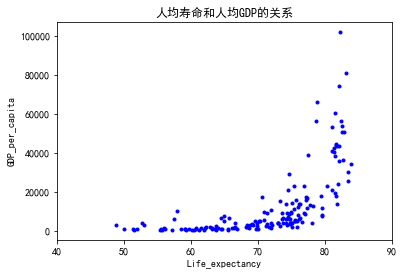

In [22]:
  #param n: 点的数量，整数
  #param s:点的大小，整数
  #return: None

# 通过切片获取横坐标x1
x1 = data1['Life_expectancy' ]
# 通过切片获取纵坐标R
y1 = data1['GDP_per_capita']
    
# 创建画图窗口
fig = plt.figure()
# 将画图窗口分成1行1列，选择第一块区域作子图
ax1 = fig.add_subplot(1, 1, 1)
# 设置标题
ax1.set_title('人均寿命和人均GDP的关系')
# 设置横坐标名称
ax1.set_xlabel('Life_expectancy')
# 设置纵坐标名称
ax1.set_ylabel('GDP_per_capita')
# 画散点图
ax1.scatter(x1, y1, c='b', marker='.')
# 调整横坐标的上下界
plt.xlim(xmax=90, xmin=40)
# 显示
plt.show()


# 人均GDP与人均寿命的气泡图（数据点大小，正比于人口数，给不同洲的国家设置不同的颜色）

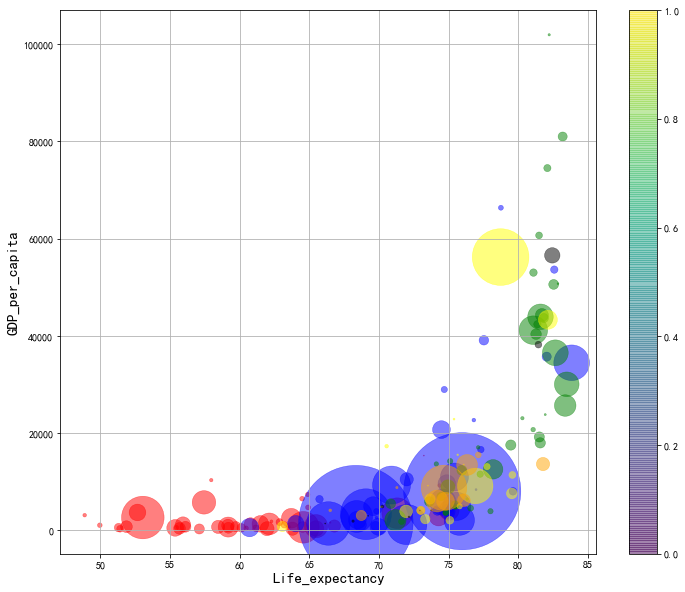

In [24]:
def DrawBubble(read_name):#气泡图
    sns.set(style = "whitegrid")#设置样式
fp = data1#数据来源
x = fp.Life_expectancy#X轴数据
y = fp.GDP_per_capita#Y轴数据
z = fp.Population#用来调整各个点的大小s
w = fp.cla#颜色

cm = plt.cm.get_cmap('RdYlBu')
fig,ax = plt.subplots(figsize = (12,10))
#注意s离散化的方法，因为需要通过点的大小来直观感受其所表示的数值大小
#参数是X轴数据、Y轴数据、各个点的大小、各个点的颜色
bubble = ax.scatter(x, y , s = z/100000, c = w, cmap = cm, linewidth = 0.5, alpha = 0.5)
ax.grid()
fig.colorbar(bubble)
ax.set_xlabel('Life_expectancy', fontsize = 15)#X轴标签
ax.set_ylabel('GDP_per_capita', fontsize = 15)#Y轴标签
plt.show()

# 2.Scipy解方程

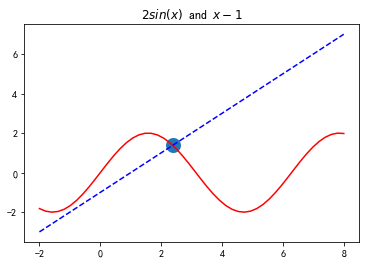

In [25]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root,fsolve
#plt.rc('text', usetex=True) #使用latex
## 使用scipy.optimize模块的root和fsolve函数进行数值求解方程

## 1、求解f(x)=2*sin(x)-x+1
rangex1 = np.linspace(-2,8)
rangey1_1,rangey1_2 = 2*np.sin(rangex1),rangex1-1
plt.figure(1)
plt.plot(rangex1,rangey1_1,'r',rangex1,rangey1_2,'b--')
plt.title('$2sin(x)$ and $x-1$')

def f1(x):
    return np.sin(x)*2-x+1

sol1_root = root(f1,[2])
sol1_fsolve = fsolve(f1,[2])
plt.scatter(sol1_fsolve,2*np.sin(sol1_fsolve),linewidths=9)
plt.show()


In [26]:
sol1_root

    fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-4.25792734e-11])
       r: array([2.44756059])
  status: 1
 success: True
       x: array([2.38006127])

In [27]:
## 2、求解线性方程组{3X1+2X2=3;X1-2X2=5}
def f2(x):
    return np.array([3*x[0]+2*x[1]-3,x[0]-2*x[1]-5])

sol2_root = root(f2,[0,0])
sol2_fsolve = fsolve(f2,[0,0])
print(sol2_fsolve) 

[ 2.  -1.5]


In [28]:
a = np.array([[3,2],[1,-2]])
b = np.array([3,5])
x = np.linalg.solve(a,b)
print(x) 

[ 2.  -1.5]
